In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
import glob
import tensorflow as tf
import os
IMG_SIZE = 112

In [4]:
def get_data(path, class_name):
    data = []
    for i in range(0, 5):
        
            files = glob.glob(path+"/"+class_name+"/"+str(i)+"/*")
            for f in files:
                img = cv2.imread(f)
                R, G, B = cv2.split(img)
                new_R = cv2.equalizeHist(R)
                new_G = cv2.equalizeHist(G)
                new_B = cv2.equalizeHist(B)
                img = cv2.merge((new_R, new_G, new_B))
                img =  cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = tf.keras.preprocessing.image.random_rotation(img, 5.0)
                img = tf.keras.preprocessing.image.random_shear(img, 5.0)
                data.append(np.array([np.array(img) / 255.0, i], dtype=object))
    np.random.shuffle(data)
    return data

In [5]:
train_data = get_data("data", "train")
train_data = np.array(train_data, dtype=object)
train_data.shape

(5778, 2)

In [6]:
train_x = []
train_y = []
for i in range(train_data.shape[0]):
    train_x.append(train_data[i][0])
    train_y.append(train_data[i][1])
train_x = np.array(train_x, ndmin=3)
train_y = np.array(train_y, ndmin=1)

In [7]:
train_x.shape

(5778, 112, 112, 3)

In [8]:
val_data = get_data("data", "val")
val_data = np.array(val_data, dtype=object)
val_data.shape

(826, 2)

In [9]:
val_x = []
val_y = []
for i in range(val_data.shape[0]):
    val_x.append(val_data[i][0])
    val_y.append(val_data[i][1])
val_x = np.array(val_x, ndmin=3)
val_y = np.array(val_y, ndmin=1)

In [10]:
test_data = get_data("data", "test")
test_data = np.array(test_data, dtype=object)
test_data.shape

(1656, 2)

In [11]:
test_x = []
test_y = []
for i in range(test_data.shape[0]):
    test_x.append(test_data[i][0])
    test_y.append(test_data[i][1])
test_x = np.array(test_x, ndmin=3)
test_y = np.array(test_y, ndmin=1)

In [12]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
lb = LabelBinarizer()
val_y = lb.fit_transform(val_y)
lb = LabelBinarizer()
test_y = lb.fit_transform(test_y)

In [13]:
train_x.shape, train_y.shape, val_x.shape, val_y.shape, test_x.shape, test_y.shape

((5778, 112, 112, 3),
 (5778, 5),
 (826, 112, 112, 3),
 (826, 5),
 (1656, 112, 112, 3),
 (1656, 5))

c:\Users\19138\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


The maximum pixel value is: 1.0 and minimum value is: 0.0
The mean pixel value is: 0.5056488005126178 and standard value is: 0.2886352402910434


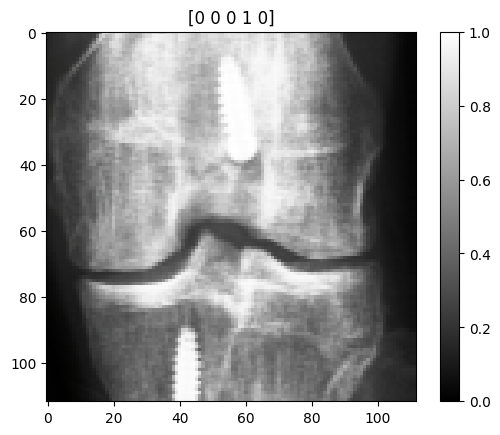

In [14]:
plt.title(train_y[11])
plt.imshow(train_x[11], cmap="gray")
plt.colorbar()

print(f"The maximum pixel value is: {train_x.max()} and minimum value is: {train_x.min()}")
print(f"The mean pixel value is: {train_x.mean()} and standard value is: {train_x.std()}")

In [18]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Conv2DTranspose, Flatten, Dense
from tensorflow.keras import Sequential

In [25]:
model = Sequential([
    tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)),
    Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(128, (3, 3), activation="relu", kernel_initializer='he_normal'),
    BatchNormalization(),
    AveragePooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(64, (3, 3), activation="relu", kernel_initializer='he_normal'),
    BatchNormalization(),
    AveragePooling2D((2, 2)),
    Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(32, (3, 3), activation="relu", kernel_initializer='he_normal'),
    BatchNormalization(),
    AveragePooling2D((2, 2)),
    Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Conv2D(16, (3, 3), activation="relu", kernel_initializer='he_normal'),
    Flatten(),
    Dense(64, activation="relu", kernel_initializer='he_normal'),
    Dense(5, activation="softmax", kernel_initializer='he_normal'),
])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 110, 110, 128)     3584      
                                                                 
 conv2d_81 (Conv2D)          (None, 108, 108, 128)     147584    
                                                                 
 conv2d_82 (Conv2D)          (None, 106, 106, 128)     147584    
                                                                 
 batch_normalization_26 (Bat  (None, 106, 106, 128)    512       
 chNormalization)                                                
                                                                 
 average_pooling2d_26 (Avera  (None, 53, 53, 128)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_83 (Conv2D)          (None, 51, 51, 64)       

In [27]:
model.compile( optimizer="adam" , loss="binary_crossentropy" , metrics=["binary_accuracy", tf.keras.metrics.AUC()])

In [28]:
hist = model.fit(train_x, train_y, epochs=5 , batch_size=32,
                    validation_data=(val_x,val_y), verbose=1)

Epoch 1/5
181/181 [==============================] - 871s 5s/step - loss: 0.4520 - binary_accuracy: 0.7949 - auc: 0.7265 - val_loss: 0.4537 - val_binary_accuracy: 0.7942 - val_auc: 0.7130
Epoch 2/5
181/181 [==============================] - 908s 5s/step - loss: 0.4214 - binary_accuracy: 0.8035 - auc: 0.7661 - val_loss: 0.4422 - val_binary_accuracy: 0.7881 - val_auc: 0.7446
Epoch 3/5
181/181 [==============================] - 1005s 6s/step - loss: 0.4046 - binary_accuracy: 0.8092 - auc: 0.7921 - val_loss: 0.4833 - val_binary_accuracy: 0.7799 - val_auc: 0.7079
Epoch 4/5
181/181 [==============================] - 1119s 6s/step - loss: 0.3935 - binary_accuracy: 0.8128 - auc: 0.8078 - val_loss: 0.4636 - val_binary_accuracy: 0.7663 - val_auc: 0.7432
Epoch 5/5
181/181 [==============================] - 986s 5s/step - loss: 0.3864 - binary_accuracy: 0.8147 - auc: 0.8165 - val_loss: 0.3835 - val_binary_accuracy: 0.8191 - val_auc: 0.8185


In [31]:
import os.path
if os.path.isfile('models/first.h5') is False:
    model.save('models/first.h5')